### eBay - soccer

In [60]:
import pandas as pd
import numpy as np

df_soccer = pd.read_csv("data/soccer_jerseys.csv")

#add discount flag
df_soccer['discount_flag'] = (~df_soccer['marketingPrice.discountPercentage'].isna()) \
                                    & (df_soccer['marketingPrice.discountPercentage'] != "")

#more cleaning
df_soccer["conditionId"] = df_soccer["conditionId"].dropna().astype(int).astype(str)
df_soccer["conditionId"] = df_soccer["conditionId"].reindex(df_soccer.index).fillna("Unspecified")
df_soccer['condition_desc'] = df_soccer['conditionId'].astype(str) + " - " + df_soccer['condition']
df_soccer["shipping_cost"] = df_soccer["shipping_cost"].fillna(0)
df_soccer["top_club"] = df_soccer["club"].notna() & (df_soccer["club"].str.strip() != "")
df_soccer["top_country"] = df_soccer["country"].notna() & (df_soccer["country"].str.strip() != "")
df_soccer.loc[df_soccer["year"] < 1970, "year"] = np.nan  #fix some strange behavior from the year calc field
df_soccer.loc[df_soccer["year"] > 2026, "year"] = np.nan
df_soccer["Messi"] = df_soccer["title"].str.lower().str.contains("messi").fillna(False)

#summary
avg_prices = df_soccer.groupby('condition_desc')['price.value'].mean().reset_index(name='mean_price')
counts = df_soccer.groupby('condition_desc')['price.value'].count().reset_index(name='counts')
condition_summary = pd.merge(avg_prices, counts, on='condition_desc')
print(condition_summary)

#df_soccer.to_csv("soccer_test.csv", index=False)

              condition_desc  mean_price  counts
0                 1000 - New   51.145087     806
1       1000 - New with tags   45.875741      54
2    1500 - New without tags   35.312000       5
3           3000 - Pre-owned   48.000000       1
4                3000 - Used   49.329550     111
5  Unspecified - Unspecified   53.342609      23


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import decomposition
import seaborn as sns

features = df_soccer[["seller.feedbackPercentage", "seller.feedbackScore", 
                    "days_listed", "shipping_cost", "seller_item_count",
                    "additional_image_count", "title_length"]].fillna(0)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = decomposition.PCA(n_components=7)  
pca.fit(features_scaled)

print("Scores (for plotting)")
scores = pca.transform(features_scaled)
scores_df = pd.DataFrame(scores, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"])
print(scores_df.head(), "\n")

print("Loadings")
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"])
loadings_df.index = features.columns
print(loadings_df)

explained_var = pca.explained_variance_ratio_
print("\n", explained_var)


Scores (for plotting)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -1.502051  2.245602  1.284418  1.061609  0.078408  0.910040  0.750363
1 -1.527250  0.563584 -0.074307  0.171996 -0.389921 -0.595667 -0.128144
2 -1.039065  2.330980  1.376270  1.062705  0.073585  1.024870  0.640120
3 -0.384877  0.871899  0.188537  0.500731 -0.011828 -0.101097  0.078400
4 -0.731861  0.753054  0.126743  0.161853 -0.413255 -0.348732 -0.465284 

Loadings
                                PC1       PC2       PC3       PC4       PC5  \
seller.feedbackPercentage  0.009969 -0.151031  0.755816 -0.133646 -0.384797   
seller.feedbackScore      -0.009098 -0.442407 -0.038262  0.600533 -0.561444   
days_listed                0.063065 -0.465727  0.267622  0.415030  0.711478   
shipping_cost             -0.057277 -0.478387  0.206607 -0.595588  0.091992   
seller_item_count         -0.202641  0.526924  0.476713  0.305147  0.145083   
additional_image_count     0.649405  0.232887  0.265980 -0.02

In [62]:
features.shape

(1000, 7)

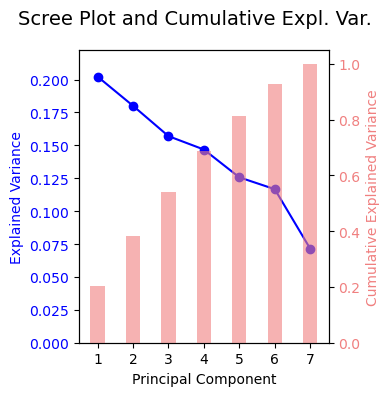

In [63]:
#Overlay scree plot and cumulative variance by component
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
components = np.arange(1, len(explained_var)+1) 

fig, ax1 = plt.subplots(figsize=(4, 4))
#screen plot
ax1.plot(components, explained_var, color='blue', marker='o', label='Scree (Individual Variance)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(components)
ax1.set_xticklabels(components)
ax1.set_ylim(0, max(explained_var)*1.1)

#cumulative variance
ax2 = ax1.twinx()
ax2.bar(components, cumulative_var, width=0.4, color='lightcoral', alpha=0.6, label='Cumulative Variance')
ax2.set_ylabel('Cumulative Explained Variance', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')
ax2.set_ylim(0, 1.05)
fig.suptitle("Scree Plot and Cumulative Expl. Var.", fontsize=14)
plt.tight_layout()
plt.savefig("images/2/scree_soccer.png", dpi=300, bbox_inches='tight')
plt.show()

### Amazon - Lego

In [64]:
#load data and additional clean
df_lego = pd.read_csv("data/lego.csv")
df_lego['sponsored'] = df_lego['sponsored'].fillna(False)
df_lego['has_coupon'] = df_lego['coupon'].notna()
df_lego['price_list_price'] = df_lego['price_list_price'].str.replace("[$,]", "", regex=True).astype(float)
df_lego['stock_info'] = df_lego['stock_info'].fillna("None")
df_lego['age_rec'] = df_lego['age_rec'].fillna("None")
df_lego["top_theme"] = df_lego["lego_theme"] != "Other"
df_lego["rating"] = df_lego["rating"].fillna(0)
df_lego["ratings_total"] = df_lego["ratings_total"].fillna(0)
df_lego.loc[df_lego["price_list_price"] < df_lego["price_value"], "price_list_price"] = np.nan
df_lego["discount$"] = round(df_lego["price_list_price"] - df_lego["price_value"], 2)
df_lego["discount%"] = round(df_lego["discount$"] / df_lego["price_list_price"], 2)
df_lego["discount$"] = df_lego["discount$"].fillna(0)
df_lego["discount%"] = df_lego["discount%"].fillna(0)
df_lego = df_lego[df_lego["title"].str.contains("Lego", case=False, na=False)]

df_lego_filt = df_lego[df_lego["recent_sales_num"].notna()]


/var/folders/vg/bxzl7hss0gs1hqxsc9zj92l80000gn/T/ipykernel_19988/1796109402.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_lego['sponsored'] = df_lego['sponsored'].fillna(False)


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import decomposition
import seaborn as sns

features_l = df_lego_filt[["rating", "ratings_total", "recent_sales_num", 
                           "discount$", "discount%"]].fillna(0)

scaler = StandardScaler()
features_l_scaled = scaler.fit_transform(features_l)

pca = decomposition.PCA(n_components=5)  
pca.fit(features_l_scaled)

print("Scores (for plotting)")
scores = pca.transform(features_l_scaled)
scores_df = pd.DataFrame(scores, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
print(scores_df.head(), "\n")

print("Loadings")
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
loadings_df.index = features_l.columns
print(loadings_df)

explained_var = pca.explained_variance_ratio_
print("\n", explained_var)

Scores (for plotting)
        PC1       PC2       PC3       PC4       PC5
0 -1.336481 -0.306922  0.179208 -0.096983 -0.270504
1 -1.685199 -0.213258 -0.759652 -0.189780 -0.145682
2 -1.420525 -0.118003  0.333858 -0.318942 -0.258225
3  0.721532 -0.429097  0.191738  1.705763 -1.110159
4  7.009425 -1.934912 -1.076086  0.842468 -1.151784 

Loadings
                       PC1       PC2       PC3       PC4       PC5
rating            0.199781  0.127472  0.953426 -0.163036 -0.090751
ratings_total     0.480981 -0.432804 -0.186825 -0.679348 -0.291412
recent_sales_num  0.424513 -0.576303  0.095592  0.684446 -0.100297
discount$         0.442214  0.635267 -0.196385  0.205123 -0.565898
discount%         0.594122  0.246461 -0.091485 -0.036928  0.759304

 [0.39617292 0.20965708 0.19463687 0.12038883 0.07914431]


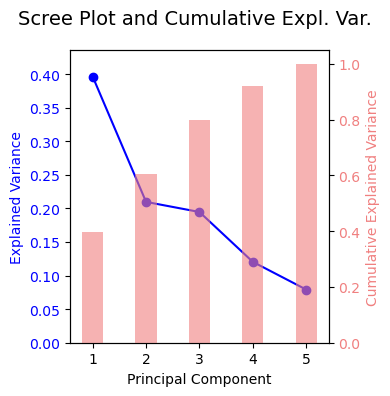

In [66]:
#Overlay scree plot and cumulative variance by component
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
components = np.arange(1, len(explained_var)+1) 

fig, ax1 = plt.subplots(figsize=(4, 4))
#screen plot
ax1.plot(components, explained_var, color='blue', marker='o', label='Scree (Individual Variance)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(components)
ax1.set_xticklabels(components)
ax1.set_ylim(0, max(explained_var)*1.1)

#cumulative variance
ax2 = ax1.twinx()
ax2.bar(components, cumulative_var, width=0.4, color='lightcoral', alpha=0.6, label='Cumulative Variance')
ax2.set_ylabel('Cumulative Explained Variance', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')
ax2.set_ylim(0, 1.05)
fig.suptitle("Scree Plot and Cumulative Expl. Var.", fontsize=14)
plt.tight_layout()
plt.savefig("images/2/scree_lego.png", dpi=300, bbox_inches='tight')
plt.show()

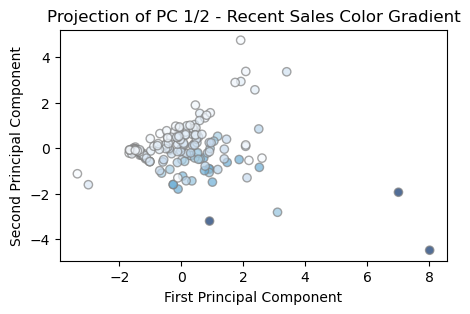

In [67]:
plt.figure(figsize=(5, 3))  
plt.scatter(scores_df["PC1"], scores_df["PC2"], c=df_lego_filt["recent_sales_num"], cmap="Blues", edgecolors="gray", alpha=0.7)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Projection of PC 1/2 - Recent Sales Color Gradient")
plt.savefig("images/2/proj_lego.png", dpi=300, bbox_inches='tight')
plt.show()

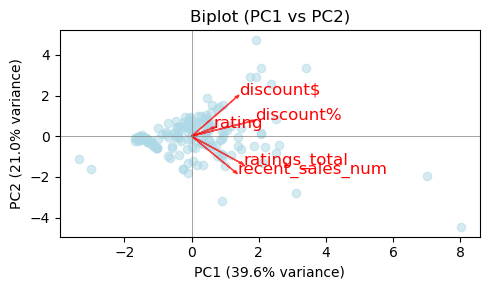

In [68]:
#biplot
plt.figure(figsize=(5, 3))

#scatter plot of scores
plt.scatter(scores_df["PC1"], scores_df["PC2"], alpha=0.5, color='lightblue')

#loadings with arrows
for i, feature in enumerate(features_l.columns):
    plt.arrow(0, 0, 
              loadings[i, 0]*3, loadings[i, 1]*3,  
              color='red', alpha=0.7, head_width=0.1)
    plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, feature, color='red', fontsize=12)

plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}% variance)")
plt.title("Biplot (PC1 vs PC2)")
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.tight_layout()
plt.savefig("images/2/biplot_lego.png", dpi=300, bbox_inches='tight')
plt.show()